In [1]:
# Imports
import requests
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Helper functions
def cache_file(url):
    """Download url and cache file locally for future use"""
    fname = url.split('/')[-1]
    if os.path.isfile(fname) is False:
        req = requests.get(url)
        # Write raw content in binary format
        with open(fname, 'wb') as f:
            f.write(req.content)
    return fname

In [2]:
# Download data and construct a DataFrame
url = 'https://iot.fvh.fi/opendata/uiras/uiras-all-data.csv.gz'
fname = cache_file(url)  # Delete file from local directory, if you want to use fresh data
cols = ['readable_time', 'batt', 'lat', 'lon', 'rssi', 'temp_in', 
        'temp_out1', 'temp_out2', 'temprh_rh', 'temprh_temp', 'dev-id']
df = pd.read_csv(fname, compression='gzip', parse_dates=['readable_time'], usecols=cols, index_col='readable_time')
df.index = df.index.rename('time') 
df.tail()

,batt,lat,lon,rssi,temp_in,temp_out1,temp_out2,temprh_rh,temprh_temp,dev-id
time,,,,,,,,,,
2021-06-23 14:14:00.898000+00:00,5.253,NaN,NaN,-107,19.86,24.68,NaN,NaN,NaN,70B3D57050001AB9
2021-06-23 14:19:50.468000+00:00,5.326,NaN,NaN,-93,14.62,20.93,NaN,NaN,NaN,70B3D57050004DF8
2021-06-23 14:22:18.561000+00:00,4.752,NaN,NaN,-105,22.45,23.62,NaN,NaN,NaN,70B3D57050004FE6
2021-06-23 14:24:01.175000+00:00,5.253,NaN,NaN,-112,19.83,24.62,NaN,NaN,NaN,70B3D57050001AB9
2021-06-23 14:26:14.416000+00:00,5.326,NaN,NaN,-99,23.31,19.18,NaN,NaN,NaN,70B3D57050004D86


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 292025 entries, 2020-01-31 22:08:19.096000+00:00 to 2021-06-23 14:26:14.416000+00:00
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   batt         292025 non-null  float64
 1   lat          1526 non-null    float64
 2   lon          1526 non-null    float64
 3   rssi         292025 non-null  int64  
 4   temp_in      291537 non-null  float64
 5   temp_out1    291537 non-null  float64
 6   temp_out2    12910 non-null   float64
 7   temprh_rh    19813 non-null   float64
 8   temprh_temp  19813 non-null   float64
 9   dev-id       292025 non-null  object 
dtypes: float64(8), int64(1), object(1)
memory usage: 24.5+ MB


In [4]:
df.head()

,batt,lat,lon,rssi,temp_in,temp_out1,temp_out2,temprh_rh,temprh_temp,dev-id
time,,,,,,,,,,
2020-01-31 22:08:19.096000+00:00,5.137,NaN,NaN,-105,2.39,1.62,NaN,NaN,NaN,70B3D57050001AB9
2020-01-31 22:18:20.076000+00:00,5.137,NaN,NaN,-110,2.47,1.62,NaN,NaN,NaN,70B3D57050001AB9
2020-01-31 22:28:22.252000+00:00,5.137,NaN,NaN,-111,2.55,1.56,NaN,NaN,NaN,70B3D57050001AB9
2020-01-31 22:38:22.101000+00:00,5.137,NaN,NaN,-108,2.47,1.62,NaN,NaN,NaN,70B3D57050001AB9
2020-01-31 22:48:23.015000+00:00,5.137,NaN,NaN,-110,2.36,1.56,NaN,NaN,NaN,70B3D57050001AB9


In [5]:
df.tail(10)

,batt,lat,lon,rssi,temp_in,temp_out1,temp_out2,temprh_rh,temprh_temp,dev-id
time,,,,,,,,,,
2021-06-23 14:11:29.128000+00:00,5.341,NaN,NaN,-111,22.67,21.37,NaN,NaN,NaN,70B3D57050004FE1
2021-06-23 14:12:17.010000+00:00,5.339,NaN,NaN,-106,22.97,25.37,NaN,NaN,NaN,70B3D5705000E6D1
2021-06-23 14:13:12.010000+00:00,5.390,NaN,NaN,-108,22.78,21.43,NaN,NaN,NaN,70B3D5705000E6E6
2021-06-23 14:13:19.658000+00:00,5.405,NaN,NaN,-109,22.22,23.62,NaN,NaN,NaN,70B3D5705000E70E
2021-06-23 14:13:45.360000+00:00,5.328,NaN,NaN,-101,21.80,25.06,NaN,26.5,21.47,70B3D57050001BA6
2021-06-23 14:14:00.898000+00:00,5.253,NaN,NaN,-107,19.86,24.68,NaN,NaN,NaN,70B3D57050001AB9
2021-06-23 14:19:50.468000+00:00,5.326,NaN,NaN,-93,14.62,20.93,NaN,NaN,NaN,70B3D57050004DF8
2021-06-23 14:22:18.561000+00:00,4.752,NaN,NaN,-105,22.45,23.62,NaN,NaN,NaN,70B3D57050004FE6
2021-06-23 14:24:01.175000+00:00,5.253,NaN,NaN,-112,19.83,24.62,NaN,NaN,NaN,70B3D57050001AB9


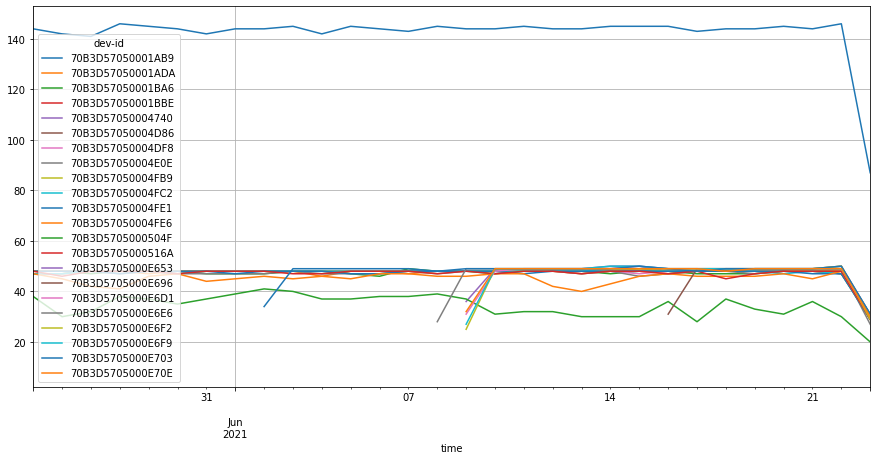

In [6]:
# Visualise packets per day. In optimal case there should be 48 
# (because sending interval should be 30 minutes)
# but there is always some packet loss

from datetime import datetime, timedelta
import pytz
today = datetime.now().astimezone(pytz.UTC).replace(hour=0, minute=0, second=0, microsecond=0)
start_time =  today - timedelta(days=30)
df_last_week = df[(df.index >= start_time) & (df.index < today)]

daily_measurements = df_last_week.groupby('dev-id').resample('24H')['dev-id'].count().unstack('dev-id')
axes = daily_measurements.plot(figsize=(15,7), grid=True)

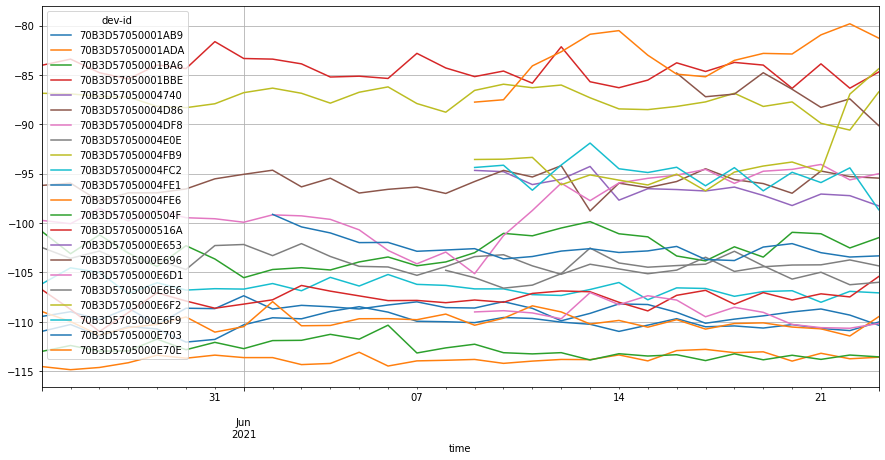

In [7]:
daily_rssi = df_last_week.groupby('dev-id').resample('24H')['rssi'].mean().unstack('dev-id')
axes = daily_rssi.plot(figsize=(15,7), grid=True)

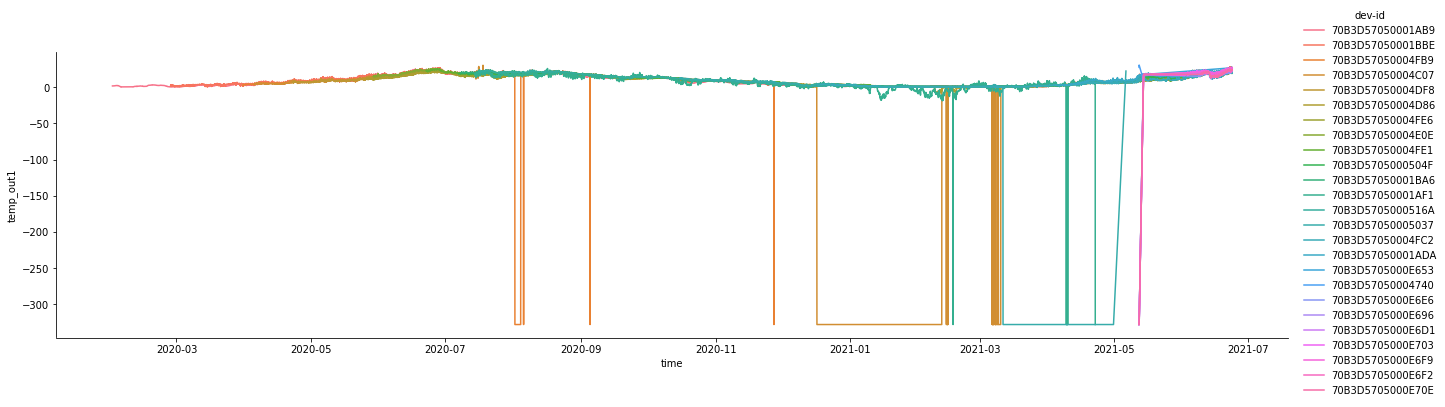

In [8]:
dfs = df.reset_index()
dfs
sns.relplot(x="time", y="temp_out1", 
            hue="dev-id",
            height=4.5, aspect=4,
            facet_kws=dict(sharex=False),
            kind="line", legend="full", data=dfs);

In [ ]:
today = datetime.now().astimezone(pytz.UTC).replace(hour=0, minute=0, second=0, microsecond=0)
start_time =  today - timedelta(days=10)
df_last_week = df[(df.index >= start_time) & (df.index < today)]

daily_measurements = df_last_week.groupby('dev-id').resample('24H')
axes = daily_measurements.plot(figsize=(15,7), grid=True)

In [ ]:
#df_last_week
daily_measurements
